Importing libraries

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import os

In [2]:
image_folder = r"C:\Users\91897\Desktop\CP302\Speckle Images\C_1\Set1\Center"
csv_file = r"C:\Users\91897\Desktop\CP302\Center Results\Mean_speckle_contrast_values_Center.csv"
df = pd.read_csv(csv_file)
Y_values = df.iloc[1:92, 4].values.astype(float)



In [3]:
# Load pretrained CNN (VGG16), excluding fully connected layers
feature_extractor = VGG16(weights='imagenet', include_top=False, input_shape=(918, 689, 3))

In [4]:
# Extract features for each image
X_values = []
for img_file in sorted(os.listdir(image_folder)):
    if img_file.endswith(".png"):
        img_path = os.path.join(image_folder, img_file)
        img = load_img(img_path, target_size=(918, 689))  # Tune as per dimensions
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        features = feature_extractor.predict(img_array)
        X_values.append(features.flatten())  # Flatten the features

# Convert list to numpy array
X_values = np.array(X_values)
Y_values = np.array(Y_values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 101s 101s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 104s 104s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 106s 106s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 106s 106s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 109s 109s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 109s 109s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 107s 107s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 109s 109s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 110s 110s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 110s 110s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 121s 121s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 113s 113s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 118s 118s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 124s 124s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 113s 113s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 103s 103s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 103s 103s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 103s 103s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 103s 103s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 102s 102s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 102s 102s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 102s 102s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 102s 102s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 104s 104s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 104s 104s/step


In [7]:
print('No of inputs X:',len(X_values))
#print('Mean Speckle Contrast values: ', Y_values)
print('Number of Mean Speckle contrast values [Y]: ',len(Y_values))
X_train, X_test, y_train, y_test = train_test_split(X_values, Y_values, test_size=0.2, random_state=42)

print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)


No of inputs X: 91
Number of Mean Speckle contrast values [Y]:  91
Shape of X_train: (72, 301056)
Shape of y_train: (72,)
Shape of X_test: (19, 301056)
Shape of y_test: (19,)


In [ ]:
np.random.seed(42)
# Model Training with RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Predict on test set
y_pred = rf.predict(X_test)
np.set_printoptions(precision=3)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0.505 0.502]
 [0.507 0.561]
 [0.515 0.549]
 [0.508 0.454]
 [0.52  0.497]
 [0.516 0.607]
 [0.506 0.474]
 [0.503 0.51 ]
 [0.51  0.561]
 [0.515 0.502]
 [0.496 0.507]
 [0.507 0.491]
 [0.507 0.479]
 [0.497 0.52 ]
 [0.504 0.481]
 [0.506 0.531]
 [0.5   0.505]
 [0.511 0.545]
 [0.504 0.507]]


In [11]:
from sklearn.metrics import mean_absolute_error
print('R2-score (test set): {:.3f}'.format(r2_score(y_test, y_pred)))
print('MSE(test set): ',mean_squared_error(y_test,y_pred))
print('MAE(test set): ',mean_absolute_error(y_test,y_pred))

R2-score (test set): 0.020
MSE(test set):  0.00126408365388857
MAE(test set):  0.028188373318421073


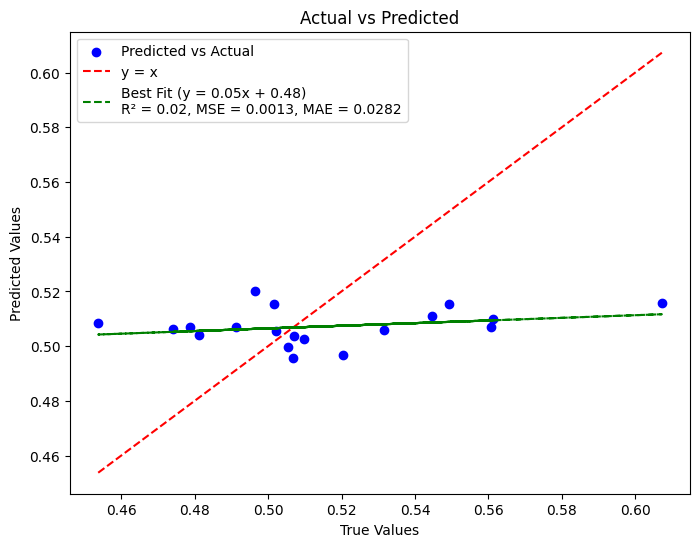

In [12]:
import matplotlib.pyplot as plt
save_dir = r"C:\Users\91897\Desktop\CP302\ML Results\RandomForest\Center"
os.makedirs(save_dir, exist_ok=True)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Predicted vs Actual',color = 'blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='y = x') #y=x line


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Best-fit line according to the plots(Regression)
slope, intercept = np.polyfit(y_test.flatten(), y_pred.flatten(), 1)
best_fit_line = slope * y_test + intercept

plt.plot(y_test, best_fit_line, 'g--', 
         label=f'Best Fit (y = {slope:.2f}x + {intercept:.2f})\nR² = {r2:.2f}, MSE = {mse:.4f}, MAE = {mae:.4f}')
plt.xlabel('True Values')
#plt.ylim(0.25,0.5)
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.savefig(os.path.join(save_dir, 'ActvsPred_C1_set1_center.png'))
plt.show()

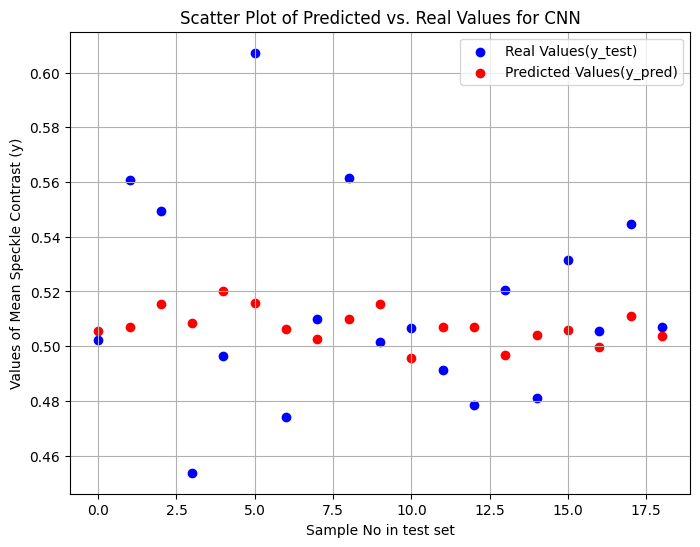

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real Values(y_test)')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values(y_pred)')
plt.title('Scatter Plot of Predicted vs. Real Values for CNN')
plt.ylabel('Values of Mean Speckle Contrast (y)')
plt.xlabel('Sample No in test set')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'scatterplot_C1_set1_center.png'))
plt.show()